In [1]:
!pip install tensorflow==2.0.0

  Stored in directory: C:\Users\mwx827397\AppData\Local\pip\Cache\wheels\5c\2e\7e\a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
  Stored in directory: C:\Users\mwx827397\AppData\Local\pip\Cache\wheels\7c\06\54\bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
  Stored in directory: C:\Users\mwx827397\AppData\Local\pip\Cache\wheels\8e\28\49\fad4e7f0b9a1227708cbbee4487ac8558a7334849cb81c813d
Successfully built gast termcolor absl-py


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [80]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [81]:
%matplotlib inline
import pandas as pd
import numpy as np
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras import layers


In [ ]:
project_path = '/content/drive/My Drive/INN/Project/data/'

In [ ]:
dataset_file = project_path + 'bank.csv'

In [82]:
os.chdir("E:\AI-ML\Introduction to Neural Networks")

In [83]:
data = pd.read_csv('bank.csv')

In [84]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [85]:
data.shape

(10000, 14)

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### 2. Droping un-necessary columns

#### Attributes such as RowNumber, CustomerId & Surname are not necessary for analysis as presence/absence of these attributes would not impact our analysis

In [87]:
df_dropped = data.drop(['RowNumber','CustomerId','Surname'], axis=1)

In [88]:
df_dropped.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [89]:
df_dropped.shape

(10000, 11)

### 3. Distinguish the Feature & Target Set

#### Lets figure out what is our target variable. Looks like a simple case but lets check if we can identify any difference b/w "IsActiveMember" & "Exited" variable

In [90]:
df_dropped['IsActiveMember'].unique()

array([1, 0], dtype=int64)

In [91]:
df_dropped['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [92]:
df_dropped['Exited'].unique()

array([1, 0], dtype=int64)

In [93]:
df_dropped['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

#### Variable "Exited" is a target feature because as the name indicates customers who have exited and secondly it looks more realistic as subscribers who have exited are almost 20% in our data while 80% are subscribers who sustained with Bank

In [94]:
df_dropped[(df_dropped['IsActiveMember']==0) & (df_dropped['Exited']==1)].shape[0] ## just to check if it is equal to total number of Exited with 1 entry

1302

### EDA

#### Lets do Exploratory Data Analysis for this data including univariate and multivariate analysis

In [95]:
df_dropped.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [96]:
df_dropped.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


#### Doesn't look like much skewness in data except 'Balance' attribute

In [97]:
df_dropped.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#### We can see there are no null values, lets look into unique values of each attribute

In [98]:
df_dropped['CreditScore'].nunique()

460

#### We have 460 unique values of 'CreditScore', lets analyze its distribution

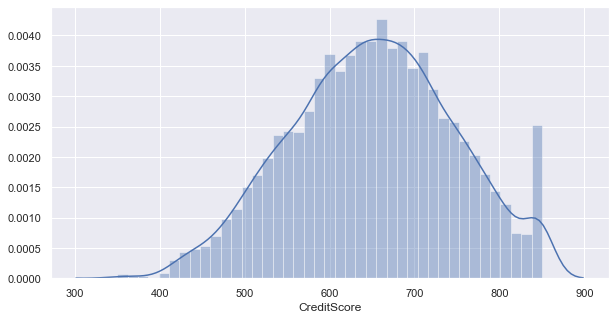

In [99]:
sns.set(color_codes=True)
plt.figure(figsize=(10,5));
sns.distplot(df_dropped['CreditScore']);

#### We can see attribute 'CreditScore' is almost normally distributed

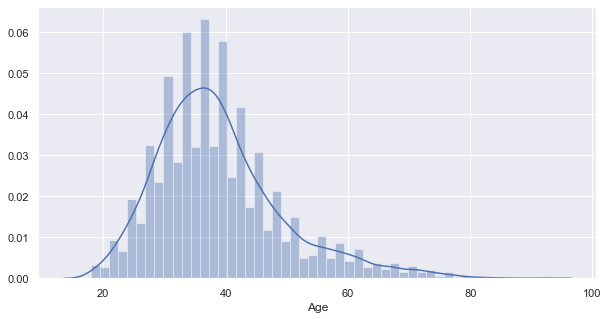

In [100]:
plt.figure(figsize=(10,5));
sns.distplot(df_dropped['Age']);

#### 'Age' attribute is also almost normally distributed, we can see most of the customers have age in between 30 to 50 years

In [101]:
print(round(((df_dropped[(df_dropped['Age'] >= 30) & (df_dropped['Age'] <= 50)].shape[0])/(df_dropped['Age'].shape[0])*100),2),"% customers have age in between 30 & 50 years")

70.98 % customers have age in between 30 & 50 years


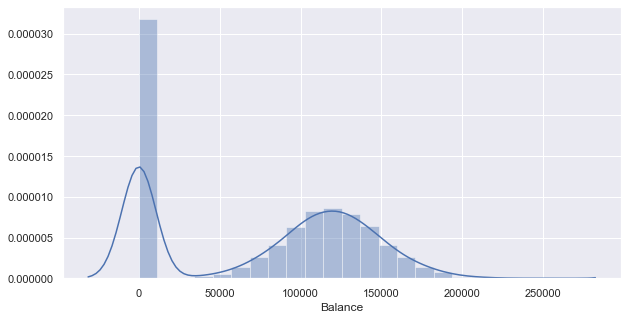

In [102]:
plt.figure(figsize=(10,5));
sns.distplot(df_dropped['Balance']);

In [103]:
df_dropped[df_dropped['Balance']==0].shape[0]/df_dropped.shape[0]

0.3617

#### 36% of customers have ZERO balance, let's analyze more about this finding

In [104]:
round((df_dropped[(df_dropped['Balance']==0) & (df_dropped['IsActiveMember']==1)].shape[0])/(df_dropped.shape[0])*100,2)

18.73

#### 18.73% customers who have ZERO balance are also active members, rest of the almost 18% customers are not Active Members

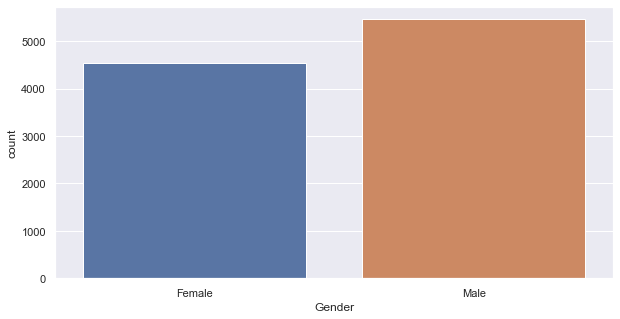

In [105]:
plt.figure(figsize=(10,5));
sns.countplot(df_dropped['Gender']);

#### Male are almost 55% and Female are almost 45% of total data set

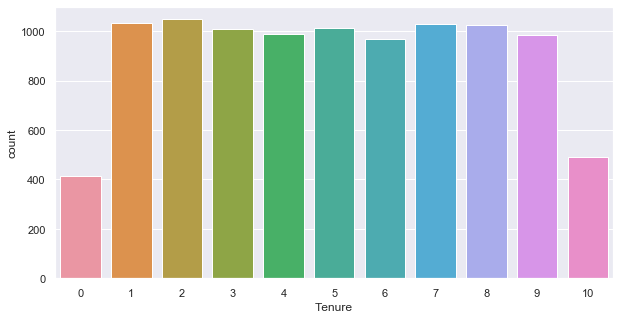

In [106]:
plt.figure(figsize=(10,5));
sns.countplot(df_dropped['Tenure']);

#### Other than 0 & 10 months, customers are quite balanced as far their Tenure per month distribution is concerned across this data set

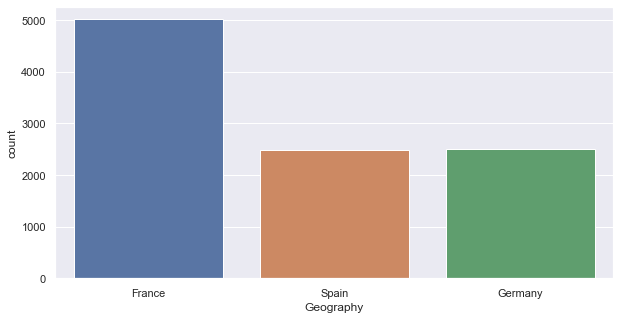

In [107]:
plt.figure(figsize=(10,5));
sns.countplot(df_dropped['Geography']);

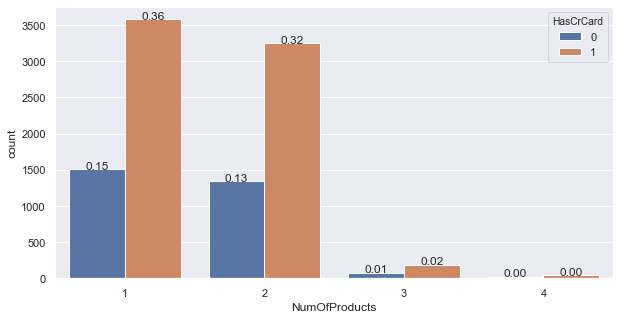

In [108]:
plt.figure(figsize=(10,5));
total = float(len(df_dropped)) # one person per row 
ax = sns.countplot(x="NumOfProducts", hue="HasCrCard", data=df_dropped)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 

#### 36% of Credit Card holders have 1 product and 32% credit card holders have 2 products. 15% of Customers who have 1 product doesn't use Credit card & 13% of Customers who have even 2 products are not using Credit Cards

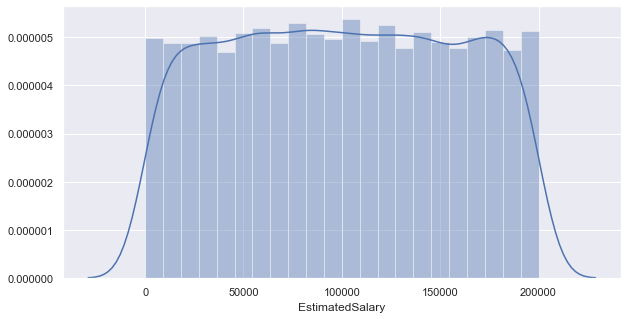

In [109]:
plt.figure(figsize=(10,5));
sns.distplot(df_dropped['EstimatedSalary']);

#### We have quite well distributed 22 chunks (bins) of histograms showing that not even a single range of customers salary is more concentrated among all customers 

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


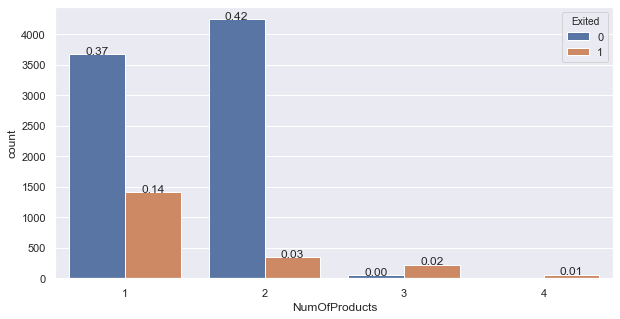

In [110]:
plt.figure(figsize=(10,5));
total = float(len(df_dropped)) # one person per row 
ax = sns.countplot(x="NumOfProducts", hue="Exited", data=df_dropped)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 

#### 14% of "Exited" customers are using a single product and only 3% of Exited customers are using 2 products

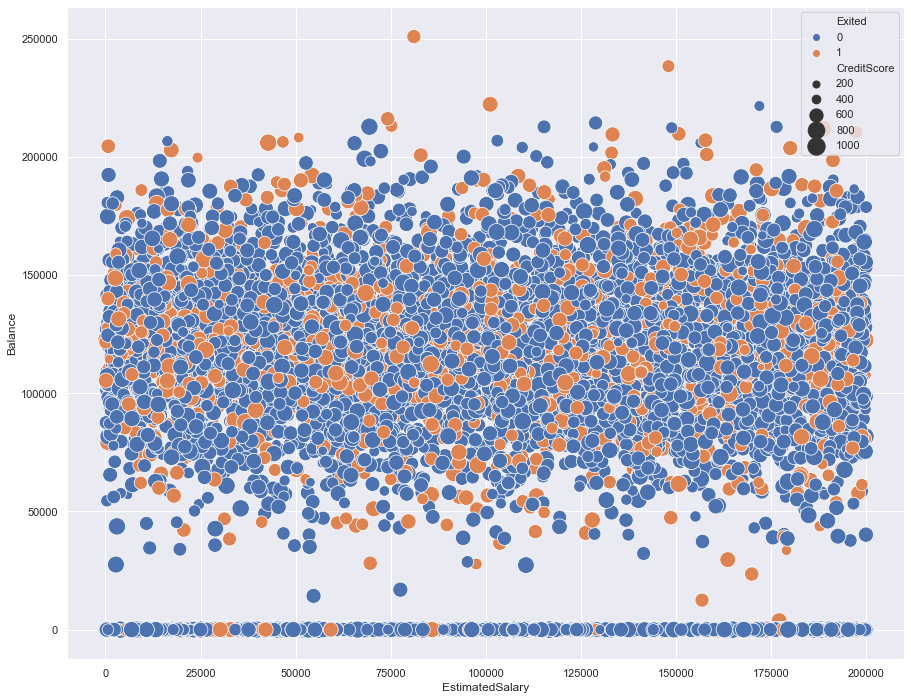

In [111]:
plt.figure(figsize=(15,12));
sns.scatterplot(y="Balance", x="EstimatedSalary", hue="Exited", size="CreditScore", data=df_dropped, sizes=(50, 300));

#### We can see customers who left are very less in ZERO balance category.
#### Very less Churned Customer in b/w 0 to 50K balance
#### Not much Churned subscribers in b/w 50K to 100K too
#### Churned subscribers look more concentrated b/w 100K to 150K
#### We can see little bunch of Churned Customers having balance and Estimated Salary around 160K to 165K
#### Very few Customers having a balance of more than 200K got churned
#### In fact Retained Customers are also very less who have balance more than 200K

In [112]:
df_dropped.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### We have 2 categorical attributes "Geography" & "Gender" and we need to apply one-hot encoding to our data set so we can further move on to X & Y seggregation of data

In [113]:
df_final = pd.get_dummies(df_dropped, drop_first=True)

In [114]:
df_final.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [115]:
df_final.dtypes

CreditScore            int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_Germany      uint8
Geography_Spain        uint8
Gender_Male            uint8
dtype: object

In [116]:
df_final['CreditScore'].dtypes

dtype('int64')

In [117]:
df_final['CreditScore'] = df_final['CreditScore'].astype('float64')

In [118]:
df_final['CreditScore'].dtypes

dtype('float64')

In [119]:
df_final['Age'] = df_final['Age'].astype('float64')

In [120]:
df_final['Tenure'] = df_final['Tenure'].astype('float64')

In [121]:
df_final['Exited'] = df_final['Exited'].astype('float64')

In [122]:
df_final['Gender_Male'] = df_final['Gender_Male'].astype('float64')

In [123]:
df_final['Geography_Germany'] = df_final['Geography_Germany'].astype('float64')

In [124]:
df_final['Geography_Spain'] = df_final['Geography_Spain'].astype('float64')

In [125]:
df_final['HasCrCard'] = df_final['HasCrCard'].astype('float64')

In [126]:
df_final['IsActiveMember'] = df_final['IsActiveMember'].astype('float64')

In [127]:
df_final['NumOfProducts'] = df_final['NumOfProducts'].astype('float64')

In [128]:
df_final.dtypes

CreditScore          float64
Age                  float64
Tenure               float64
Balance              float64
NumOfProducts        float64
HasCrCard            float64
IsActiveMember       float64
EstimatedSalary      float64
Exited               float64
Geography_Germany    float64
Geography_Spain      float64
Gender_Male          float64
dtype: object

#### All attributes have been succesfully converted to float64

In [129]:
df_final.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0,0.0,0.0,0.0
1,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0,0.0,1.0,0.0
2,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0,0.0,0.0,0.0
3,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0,0.0,0.0,0.0
4,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0,0.0,1.0,0.0


#### As we have observed 'Exited' is our target variable. Now, lets segregate X & Y while assigning target variable to Y and rest of the attriubutes to X

In [130]:
X_data = df_final.loc[:,df_final.columns != 'Exited']

In [131]:
X_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,0.0,0.0,0.0
1,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0,1.0,0.0
2,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,0.0,0.0,0.0
3,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0,0.0,0.0
4,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0,1.0,0.0


In [132]:
X_data.shape

(10000, 11)

In [133]:
y_data = df_final['Exited']

In [134]:
y_data.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: Exited, dtype: float64

In [135]:
y_data.shape

(10000,)

### 4. Train & Test Data

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state = 7)

In [137]:
X_train.shape

(8000, 11)

In [138]:
X_test.shape

(2000, 11)

In [139]:
y_train.shape

(8000,)

In [140]:
y_test.shape

(2000,)

### 5. Normalization

#### Lets normalize our train and test data

In [141]:
X_train = preprocessing.normalize(X_train)

In [142]:
X_test = preprocessing.normalize(X_test)

In [143]:
X_train

array([[9.83889833e-01, 6.25685109e-02, 1.40779149e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.56421277e-03],
       [4.07481381e-03, 2.14463885e-04, 1.42975923e-05, ...,
        0.00000000e+00, 0.00000000e+00, 7.14879616e-06],
       [3.25738767e-03, 2.69496102e-04, 1.75758327e-05, ...,
        0.00000000e+00, 5.85861092e-06, 5.85861092e-06],
       ...,
       [4.23638988e-03, 2.16774336e-04, 3.71613148e-05, ...,
        0.00000000e+00, 0.00000000e+00, 6.19355246e-06],
       [5.37737031e-03, 2.66516896e-04, 7.05485901e-05, ...,
        0.00000000e+00, 7.83873224e-06, 7.83873224e-06],
       [4.36238487e-03, 1.56444147e-04, 3.61024955e-05, ...,
        0.00000000e+00, 0.00000000e+00, 6.01708258e-06]])

In [144]:
X_test

array([[4.10249687e-03, 2.00261353e-04, 5.72175295e-06, ...,
        0.00000000e+00, 5.72175295e-06, 5.72175295e-06],
       [4.40738138e-03, 4.68731846e-04, 5.20813162e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.73614534e-03, 2.82097457e-04, 4.27420390e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [3.34275048e-03, 1.94524530e-04, 4.09525327e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.69067938e-03, 3.36749426e-04, 3.54473080e-05, ...,
        8.86182700e-06, 0.00000000e+00, 8.86182700e-06],
       [3.26165148e-03, 1.76783278e-04, 2.65174917e-05, ...,
        4.41958195e-06, 0.00000000e+00, 0.00000000e+00]])

### 6. Model Creation

#### Lets initialize Keras model object with Sequential class

In [145]:
model = Sequential()

### Adding Layers and Activation Functions

#### Adding Keras layers to the model.
#### As this is a classification problem, sigmoid layer should be added

In [146]:
model.add(Dense(64, input_shape=(11,), activation='relu'))
model.add(Dense(32, activation= 'tanh'))
model.add(Dense(1, activation= 'sigmoid'))

#### Model Compilation

#### Let's compile model using 'binary_crossentrop' as a loss function

In [147]:
sgd = tf.keras.optimizers.Adadelta(
    learning_rate=0.001, rho= 0.95, epsilon=1e-08, name="Adadelta")

#sgd = optimizers.Adam(lr = 0.1)

In [148]:
model.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics=['accuracy'])

#### Summary of the Model

In [149]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                768       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


#### Model Training (Forward Propagation & Backward Propagation)

In [150]:
model.fit(X_train, y_train.values, batch_size = 100, epochs = 10, verbose = 1)

Train on 8000 samples
Epoch 1/10
8000/8000 [==============================] - 0s 48us/sample - loss: 0.6562 - accuracy: 0.7423
Epoch 2/10
8000/8000 [==============================] - 0s 13us/sample - loss: 0.6558 - accuracy: 0.7434
Epoch 3/10
8000/8000 [==============================] - 0s 13us/sample - loss: 0.6553 - accuracy: 0.7460
Epoch 4/10
8000/8000 [==============================] - 0s 13us/sample - loss: 0.6548 - accuracy: 0.7475
Epoch 5/10
8000/8000 [==============================] - 0s 13us/sample - loss: 0.6542 - accuracy: 0.7486
Epoch 6/10
8000/8000 [==============================] - 0s 14us/sample - loss: 0.6537 - accuracy: 0.7501
Epoch 7/10
8000/8000 [==============================] - 0s 12us/sample - loss: 0.6531 - accuracy: 0.7521
Epoch 8/10
8000/8000 [==============================] - 0s 16us/sample - loss: 0.6525 - accuracy: 0.7542
Epoch 9/10
8000/8000 [==============================] - 0s 13us/sample - loss: 0.6519 - accuracy: 0.7559
Epoch 10/10
8000/8000 [==========

#### Evaluation

#### Lets evaluate model using evaluate() function

In [151]:
results = model.evaluate(X_test, y_test.values)

2000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [152]:
print(model.metrics_names)
print(results)

['loss', 'accuracy']
[0.6496635246276855, 0.7655]


### 8. Confusion Matrix

In [153]:
Y_pred_cls = model.predict_classes(X_test, batch_size=50, verbose=0)
print('Accuracy Model1 (Dropout): '+ str(model.evaluate(X_test,y_test.values)[1]))
print('Recall_score: ' + str(recall_score(y_test.values,Y_pred_cls)))
print('Precision_score: ' + str(precision_score(y_test.values, Y_pred_cls)))
print('F-score: ' + str(f1_score(y_test.values,Y_pred_cls)))
confusion_matrix(y_test.values, Y_pred_cls)

2000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

array([[1489,  100],
       [ 369,   42]], dtype=int64)

### 6. Model Optimization Steps

#### Model has been compiled on various different optimizers
#### Initially, it was compiled with "Adam" optimizer but in that case Recall was 0 and there was not even a single True Positive
#### Then model was compiled with "Adagrad" optimizer and results were not that much different
#### Different learning rates was tried and model was compiled with it but results were not optimizing
#### Model was also compiled with "RMSprop" optimizer and Recall was not being more than 0 and very close to 0
#### As it is a "CHURN" model, Recall is our performance metric because we have to minimize False Negatives
#### Finally, model was compiled after optimizing with "Adadelta". It showed considerable number of True Positives and False Negatives were optimized too

### 7. Predicting Results using 0.5 Threshold

In [154]:
 y_pred = (model.predict_proba(X_test)[:,0] >= 0.5)
 print("Adjust threshold to 0.5:")
 print("Precision: {:.4f}, Recall: {:.4f}, F1 Score: {:.4f}, Accuracy Score: {:.4f}".format(
 precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), accuracy_score(y_test, y_pred)))
 print("confusion matrix: \n", confusion_matrix(y_test, y_pred))

Adjust threshold to 0.5:
Precision: 0.2958, Recall: 0.1022, F1 Score: 0.1519, Accuracy Score: 0.7655
confusion matrix: 
 [[1489  100]
 [ 369   42]]


### Predicting Results using 0.75 Threshold

In [155]:
 y_pred = (model.predict_proba(X_test)[:,0] >= 0.75)
 print("Adjust threshold to 0.75:")
 print("Precision: {:.4f}, Recall: {:.4f}, F1 Score: {:.4f}, Accuracy Score: {:.4f}".format(
 precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), accuracy_score(y_test, y_pred)))
 print("confusion matrix: \n", confusion_matrix(y_test, y_pred))

Adjust threshold to 0.75:
Precision: 0.0000, Recall: 0.0000, F1 Score: 0.0000, Accuracy Score: 0.7945
confusion matrix: 
 [[1589    0]
 [ 411    0]]


C:\Users\mwx827397\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mwx827397\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


### We can say that 0.5 Threshold is giving us better results as we make threshold 0.75 our Recall, F1 Score & Precision becomes 0